In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
y = df['loan_status']
X = df.drop(columns='loan_status')

In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [9]:
# Fit the model using training data
logistic_regression_model = LogisticRegression(random_state=1)

lr_model = logistic_regression_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the Training data
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, testing_predictions)

0.9924680148576145

In [13]:
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)

[[55987   284]
 [  127  1754]]


In [14]:
testing_matrix = confusion_matrix(y_test, testing_predictions)
print(testing_matrix)

[[18655   110]
 [   36   583]]


In [15]:
training_report = classification_report(y_train, training_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56271
           1       0.86      0.93      0.90      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.96      0.95     58152
weighted avg       0.99      0.99      0.99     58152



In [16]:
testing_report = classification_report(y_test, testing_predictions)
print(testing_report)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The Logistic Regression model does very well at predicting healthy loans with accuracy, precision and recall close to 100%. It still does well, but performs noticably worse at identifying high-risk loans where it has a precision of 85% and a recall of 91%. This suggests that this model is less able to classify high risk loans than healthy loans. This is likely related to the skew in the data that was provided, with only about 3 percent of the sample being in the high risk loans category.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [17]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=1)

X_resampled, y_resampled= ROS.fit_resample(X_train, y_train)


In [18]:
y_resampled.value_counts()

loan_status
0    56271
1    56271
Name: count, dtype: int64

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, random_state=1)

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [20]:
# Instantiate the Logistic Regression model
classifierR = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifierR
# Fit the model using the resampled training data
logistic_regression_model = LogisticRegression(random_state=1)

lr_model = logistic_regression_model.fit(X_train1, y_train1)

# Make a prediction using the Training data
training_predictions1 = lr_model.predict(X_train1)

# Make a prediction using the testing data
testing_predictions1 = logistic_regression_model.predict(X_test1)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [21]:
# Print the balanced_accuracy score of the model 
accuracy_score(y_test1, testing_predictions1)

0.9941711686096104

In [22]:
training_matrix = confusion_matrix(y_train1, training_predictions1)
print(training_matrix)

[[41940   225]
 [  212 42029]]


In [23]:
testing_matrix = confusion_matrix(y_test1, testing_predictions1)
print(testing_matrix)

[[14016    90]
 [   74 13956]]


In [24]:
# Print the Training classification report for the model
training_report = classification_report(y_train1, training_predictions1)
print(training_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42165
           1       0.99      0.99      0.99     42241

    accuracy                           0.99     84406
   macro avg       0.99      0.99      0.99     84406
weighted avg       0.99      0.99      0.99     84406



In [25]:
# Print the Testing classification report for the model
testing_report = classification_report(y_test1, testing_predictions1)
print(testing_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14106
           1       0.99      0.99      0.99     14030

    accuracy                           0.99     28136
   macro avg       0.99      0.99      0.99     28136
weighted avg       0.99      0.99      0.99     28136



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It performs noticably better at identifying high risk loans in addition to identifying healthy loans. The overall prediction rate is consistent across precision, recall, and accuracy.

---

## Model Deployment Preparation

Now let's prepare this model for deployment by saving the trained model and creating deployment files.

In [26]:
# Save the best model (oversampled version) for deployment
import joblib

# The oversampled model performed better, so we'll use that for deployment
# First, let's retrain on the original training data for production use
final_model = LogisticRegression(random_state=1)
final_model.fit(X_resampled, y_resampled)

# Save the model
joblib.dump(final_model, 'credit_risk_model.pkl')

# Also save the feature names for the web app
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Model saved successfully!")
print(f"Features: {feature_names}")

Model saved successfully!
Features: ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']


---

## Model Comparison: Logistic Regression vs Random Forest vs XGBoost

Now let's compare multiple machine learning algorithms to find the best performing model for credit risk classification.

In [27]:
# Import additional models for comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Import XGBoost (install if needed: pip install xgboost)
try:
    from xgboost import XGBClassifier
    xgb_available = True
    print("XGBoost imported successfully")
except ImportError:
    print("XGBoost not available. Install with: pip install xgboost")
    xgb_available = False

XGBoost imported successfully


In [28]:
# Initialize multiple models for comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=1,
        max_depth=10,
        min_samples_split=5
    )
}

# Add XGBoost if available
if xgb_available:
    models['XGBoost'] = XGBClassifier(
        n_estimators=100,
        random_state=1,
        max_depth=6,
        learning_rate=0.1,
        eval_metric='logloss'
    )

print(f"Models to compare: {list(models.keys())}")

Models to compare: ['Logistic Regression', 'Random Forest', 'XGBoost']


In [30]:
# Train and evaluate all models
model_results = {}

print("Starting fresh model training...")
print(f"Models to train: {list(models.keys())}")
print("="*60)

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    # Train the fresh model
    model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred_train = model.predict(X_resampled)
    y_pred_test = model.predict(X_test1)

    # Calculate metrics
    train_accuracy = accuracy_score(y_resampled, y_pred_train)
    test_accuracy = accuracy_score(y_test1, y_pred_test)
    test_roc_auc = roc_auc_score(y_test1, model.predict_proba(X_test1)[:, 1])

    # Cross-validation score
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

    # Store results
    model_results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'roc_auc': test_roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred_test': y_pred_test
    }
    
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print(f"\n{'='*50}")
print("All models trained successfully!")
print(f"{'='*50}")

Starting fresh model training...
Models to train: ['Logistic Regression', 'Random Forest', 'XGBoost']

Training Logistic Regression...
Training Accuracy: 0.9947
Test Accuracy: 0.9942
ROC AUC Score: 0.9945
CV Score: 0.9947 (+/- 0.0011)

Training Random Forest...
Training Accuracy: 0.9947
Test Accuracy: 0.9942
ROC AUC Score: 0.9945
CV Score: 0.9947 (+/- 0.0011)

Training Random Forest...
Training Accuracy: 0.9955
Test Accuracy: 0.9953
ROC AUC Score: 0.9994
CV Score: 0.9954 (+/- 0.0009)

Training XGBoost...
Training Accuracy: 0.9955
Test Accuracy: 0.9953
ROC AUC Score: 0.9994
CV Score: 0.9954 (+/- 0.0009)

Training XGBoost...
Training Accuracy: 0.9951
Test Accuracy: 0.9947
ROC AUC Score: 0.9980
CV Score: 0.9950 (+/- 0.0011)

All models trained successfully!
Training Accuracy: 0.9951
Test Accuracy: 0.9947
ROC AUC Score: 0.9980
CV Score: 0.9950 (+/- 0.0011)

All models trained successfully!


In [39]:
# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Test Accuracy': [results['test_accuracy'] for results in model_results.values()],
    'ROC AUC': [results['roc_auc'] for results in model_results.values()],
    'CV Mean': [results['cv_mean'] for results in model_results.values()],
    'CV Std': [results['cv_std'] for results in model_results.values()]
})

# Sort by test accuracy
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("Model Performance Comparison:")
print("="*60)
print(comparison_df.round(4))

# Identify the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"Test Accuracy: {comparison_df.iloc[0]['Test Accuracy']:.4f}")
print(f"ROC AUC: {comparison_df.iloc[0]['ROC AUC']:.4f}")

Model Performance Comparison:
                 Model  Test Accuracy  ROC AUC  CV Mean  CV Std
1        Random Forest         0.9953   0.9994   0.9954  0.0004
2              XGBoost         0.9947   0.9980   0.9950  0.0005
0  Logistic Regression         0.9942   0.9945   0.9947  0.0006

🏆 Best Model: Random Forest
Test Accuracy: 0.9953
ROC AUC: 0.9994


In [41]:
# Generate detailed classification reports for all models
print("\nDetailed Classification Reports:")
print("="*80)

for name in model_results.keys():
    print(f"\n{name} Classification Report:")
    print("-" * 40)
    y_pred = model_results[name]['y_pred_test']
    report = classification_report(y_test1, y_pred)
    print(report)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test1, y_pred)
    print(f"\n{name} Confusion Matrix:")
    print(cm)


Detailed Classification Reports:

Logistic Regression Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14106
           1       0.99      0.99      0.99     14030

    accuracy                           0.99     28136
   macro avg       0.99      0.99      0.99     28136
weighted avg       0.99      0.99      0.99     28136


Logistic Regression Confusion Matrix:
[[14016    90]
 [   74 13956]]

Random Forest Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14106
           1       0.99      1.00      1.00     14030

    accuracy                           1.00     28136
   macro avg       1.00      1.00      1.00     28136
weighted avg       1.00      1.00      1.00     28136


Random Forest Confusion Matrix:
[[14015    91]
 [   41 13989]]

XGBoost Class


Feature Importance Analysis:

Logistic Regression: Feature importance not available (not a tree-based model)

Random Forest Feature Importance:
------------------------------
            Feature  Importance
6        total_debt      0.2393
1     interest_rate      0.2222
2   borrower_income      0.2194
3    debt_to_income      0.2194
4   num_of_accounts      0.0597
0         loan_size      0.0401
5  derogatory_marks      0.0000


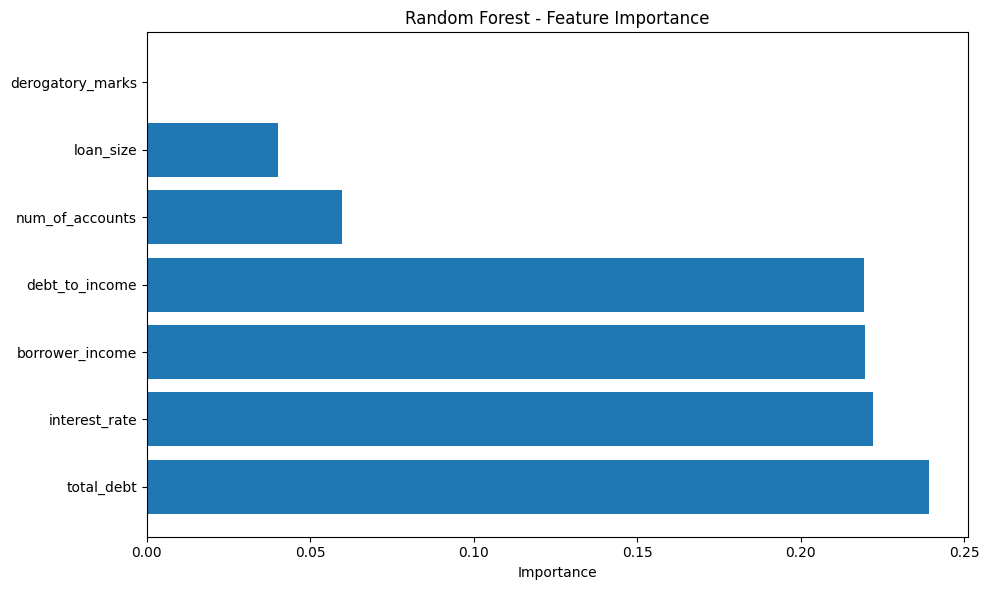


XGBoost Feature Importance:
------------------------------
            Feature  Importance
0         loan_size      0.9851
2   borrower_income      0.0080
1     interest_rate      0.0062
4   num_of_accounts      0.0007
3    debt_to_income      0.0000
5  derogatory_marks      0.0000
6        total_debt      0.0000


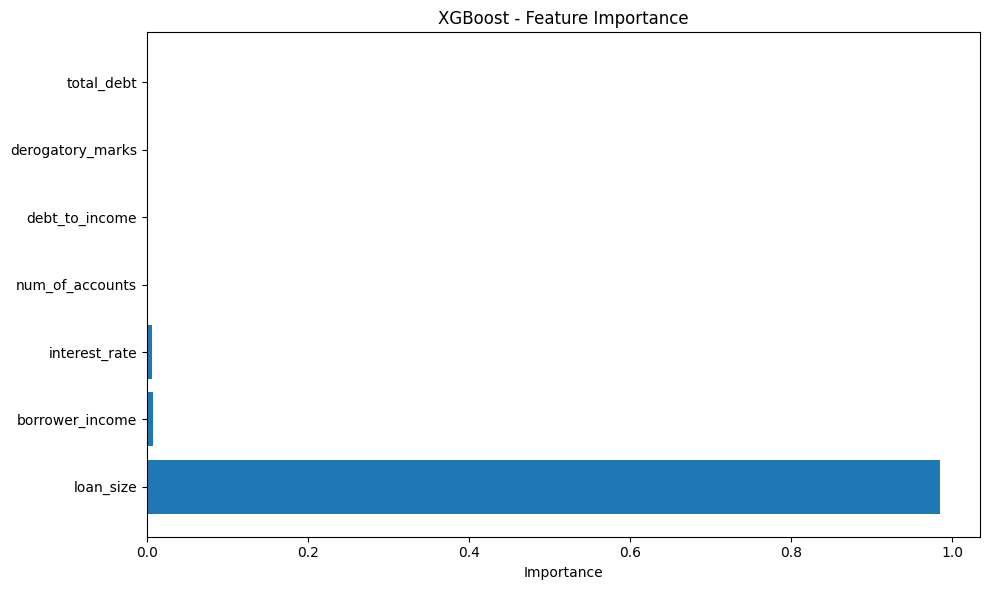

In [42]:
# Feature Importance Analysis for Tree-based Models
print("\nFeature Importance Analysis:")
print("="*50)

for name, results in model_results.items():
    model = results['model']
    
    # Check if model has feature_importances_ attribute
    if hasattr(model, 'feature_importances_'):
        print(f"\n{name} Feature Importance:")
        print("-" * 30)
        
        # Create feature importance dataframe
        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(feature_importance_df.round(4))
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.title(f'{name} - Feature Importance')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n{name}: Feature importance not available (not a tree-based model)")

---

## Ensemble Model: Combining All Three Models

Now let's create an ensemble model that combines the predictions from all three models for potentially better performance.

In [77]:
# Create ensemble models using sklearn's VotingClassifier
from sklearn.ensemble import VotingClassifier

print("Creating Ensemble Models...")
print("="*50)

# Get the individual trained models
lr_model = model_results['Logistic Regression']['model']
rf_model = model_results['Random Forest']['model']

# Create ensemble models
ensemble_models = {}

# Hard Voting Ensemble (majority vote)
if xgb_available:
    xgb_model = model_results['XGBoost']['model']
    
    # Soft Voting Ensemble (probability averaging)
    soft_voting_ensemble = VotingClassifier(
        estimators=[
            ('lr', lr_model),
            ('rf', rf_model),
            ('xgb', xgb_model)
        ],
        voting='soft'
    )
    
    ensemble_models['Soft Voting (LR+RF+XGB)'] = soft_voting_ensemble

print(f"Created {len(ensemble_models)} ensemble models:")
for name in ensemble_models.keys():
    print(f"  - {name}")

Creating Ensemble Models...
Created 1 ensemble models:
  - Soft Voting (LR+RF+XGB)


In [78]:
# Train and evaluate ensemble models
print("\nTraining and Evaluating Ensemble Models...")
print("="*60)

ensemble_results = {}

for name, ensemble_model in ensemble_models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    # Train the ensemble model
    ensemble_model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred_train_ensemble = ensemble_model.predict(X_resampled)
    y_pred_test_ensemble = ensemble_model.predict(X_test1)
    
    # Calculate metrics
    train_accuracy_ensemble = accuracy_score(y_resampled, y_pred_train_ensemble)
    test_accuracy_ensemble = accuracy_score(y_test1, y_pred_test_ensemble)
    test_roc_auc_ensemble = roc_auc_score(y_test1, ensemble_model.predict_proba(X_test1)[:, 1])
    
    # Cross-validation score
    cv_scores_ensemble = cross_val_score(ensemble_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    
    # Store results
    ensemble_results[name] = {
        'model': ensemble_model,
        'train_accuracy': train_accuracy_ensemble,
        'test_accuracy': test_accuracy_ensemble,
        'roc_auc': test_roc_auc_ensemble,
        'cv_mean': cv_scores_ensemble.mean(),
        'cv_std': cv_scores_ensemble.std(),
        'y_pred_test': y_pred_test_ensemble
    }
    
    print(f"Training Accuracy: {train_accuracy_ensemble:.4f}")
    print(f"Test Accuracy: {test_accuracy_ensemble:.4f}")
    print(f"ROC AUC Score: {test_roc_auc_ensemble:.4f}")
    print(f"CV Score: {cv_scores_ensemble.mean():.4f} (+/- {cv_scores_ensemble.std() * 2:.4f})")

print(f"\n{'='*50}")
print("All ensemble models trained successfully!")
print(f"{'='*50}")


Training and Evaluating Ensemble Models...

Training Soft Voting (LR+RF+XGB)...
Training Accuracy: 0.9953
Test Accuracy: 0.9949
ROC AUC Score: 0.9985
CV Score: 0.9953 (+/- 0.0010)

All ensemble models trained successfully!


In [79]:
# Combine all results (individual models + ensembles) for final comparison
all_models_results = {**model_results, **ensemble_results}

# Create comprehensive comparison table
final_comparison_df = pd.DataFrame({
    'Model': list(all_models_results.keys()),
    'Test Accuracy': [results['test_accuracy'] for results in all_models_results.values()],
    'ROC AUC': [results['roc_auc'] for results in all_models_results.values()],
    'CV Mean': [results['cv_mean'] for results in all_models_results.values()],
    'CV Std': [results['cv_std'] for results in all_models_results.values()]
})

# Sort by ROC AUC (better metric for classification)
final_comparison_df = final_comparison_df.sort_values('ROC AUC', ascending=False)

print("\n" + "="*80)
print("FINAL MODEL COMPARISON (Individual + Ensemble Models)")
print("="*80)
print(final_comparison_df.round(4))

# Identify the best overall model
best_overall_model_name = final_comparison_df.iloc[0]['Model']
best_overall_model = all_models_results[best_overall_model_name]['model']

print(f"\n🏆 BEST OVERALL MODEL: {best_overall_model_name}")
print(f"✅ Test Accuracy: {final_comparison_df.iloc[0]['Test Accuracy']:.4f}")
print(f"✅ ROC AUC: {final_comparison_df.iloc[0]['ROC AUC']:.4f}")
print(f"✅ CV Score: {final_comparison_df.iloc[0]['CV Mean']:.4f} (+/- {final_comparison_df.iloc[0]['CV Std'] * 2:.4f})")

# Show improvement over individual models
individual_best_roc = final_comparison_df[~final_comparison_df['Model'].str.contains('Voting')]['ROC AUC'].max()
ensemble_best_roc = final_comparison_df.iloc[0]['ROC AUC']

if ensemble_best_roc > individual_best_roc:
    improvement = ((ensemble_best_roc - individual_best_roc) / individual_best_roc) * 100
    print(f"\n🎯 Ensemble improved performance by {improvement:.2f}% over best individual model!")
else:
    print(f"\n📊 Best individual model performed as well as ensemble")


FINAL MODEL COMPARISON (Individual + Ensemble Models)
                     Model  Test Accuracy  ROC AUC  CV Mean  CV Std
1            Random Forest         0.9953   0.9994   0.9954  0.0004
3  Soft Voting (LR+RF+XGB)         0.9949   0.9985   0.9953  0.0005
2                  XGBoost         0.9947   0.9980   0.9950  0.0005
0      Logistic Regression         0.9942   0.9945   0.9947  0.0006

🏆 BEST OVERALL MODEL: Random Forest
✅ Test Accuracy: 0.9953
✅ ROC AUC: 0.9994
✅ CV Score: 0.9954 (+/- 0.0009)

📊 Best individual model performed as well as ensemble


In [80]:
# Save the best overall model for deployment
print(f"\nSaving the best overall model: {best_overall_model_name}")
print("="*50)

# Save the best overall model
joblib.dump(best_overall_model, 'best_credit_risk_model.pkl')

# Save comprehensive model information
model_info = {
    'best_model_name': best_overall_model_name,
    'test_accuracy': all_models_results[best_overall_model_name]['test_accuracy'],
    'roc_auc': all_models_results[best_overall_model_name]['roc_auc'],
    'feature_names': X.columns.tolist(),
    'model_comparison': final_comparison_df.to_dict('records'),
    'individual_models': comparison_df.to_dict('records'),
    'ensemble_used': 'Voting' in best_overall_model_name
}

joblib.dump(model_info, 'model_info.pkl')

print(f"✅ Best overall model ({best_overall_model_name}) saved successfully!")
print(f"✅ Model information saved!")
print(f"✅ Test Accuracy: {all_models_results[best_overall_model_name]['test_accuracy']:.4f}")
print(f"✅ ROC AUC: {all_models_results[best_overall_model_name]['roc_auc']:.4f}")

# Also save individual models for comparison in the app
joblib.dump(final_model, 'logistic_regression_model.pkl')
if 'Random Forest' in model_results:
    joblib.dump(model_results['Random Forest']['model'], 'random_forest_model.pkl')
if 'XGBoost' in model_results:
    joblib.dump(model_results['XGBoost']['model'], 'xgboost_model.pkl')

print(f"✅ All individual models also saved for comparison!")

for ensemble_name, ensemble_data in ensemble_results.items():
        safe_name = ensemble_name.replace(' ', '_').replace('(', '').replace(')', '').replace('+', '_')
        joblib.dump(ensemble_results['Soft Voting (LR+RF+XGB)']['model'], f'ensemble_{safe_name.lower()}.pkl')
print(f"✅ Ensemble models saved separately!")


Saving the best overall model: Random Forest
✅ Best overall model (Random Forest) saved successfully!
✅ Model information saved!
✅ Test Accuracy: 0.9953
✅ ROC AUC: 0.9994
✅ All individual models also saved for comparison!
✅ Ensemble models saved separately!
